# Basic Statistics - Python - Money Ball Case Study

## Content

The variables are as follows:
1) Team
2) League
3) Year
4) Runs Scored (RS)
5) Runs Allowed (RA)
6) Wins (W)
7) On-Base Percentage (OBP)
8) Slugging Percentage (SLG)
9) Batting Average (BA)
10) Playoffs (binary)
11) RankSeason
12) RankPlayoffs
13) Games Played (G)
14) Opponent On-Base Percentage (OOBP)
15) Opponent Slugging Percentage (OSLG)

## Acknowledgements

https://www.sports-reference.com/ is one of the most comprehensive sports statistics resources available, and I highly recommend checking it out.



# Directories, Libraries and Data

In [1]:
# Directory 
%cd C:\Users\shrav\Data_Analysis_Projects\Datasets\Basic Statistics

C:\Users\shrav\Data_Analysis_Projects\Datasets\Basic Statistics


In [2]:
# Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data 
df = pd.read_csv("Baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
df.describe().round(2)

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.0,244.00,244.00,1232.00,420.00,420.00
mean,1988.96,715.08,715.08,80.90,0.33,0.40,0.26,0.2,3.12,2.72,161.92,0.33,0.42
std,14.82,91.53,93.08,11.46,0.02,0.03,0.01,0.4,1.74,1.10,0.62,0.02,0.03
min,1962.00,463.00,472.00,40.00,0.28,0.30,0.21,0.0,1.00,1.00,158.00,0.29,0.35
25%,1976.75,652.00,649.75,73.00,0.32,0.38,0.25,0.0,2.00,2.00,162.00,0.32,0.40
50%,1989.00,711.00,709.00,81.00,0.33,0.40,0.26,0.0,3.00,3.00,162.00,0.33,0.42
75%,2002.00,775.00,774.25,89.00,0.34,0.42,0.27,0.0,4.00,4.00,162.00,0.34,0.44
max,2012.00,1009.00,1103.00,116.00,0.37,0.49,0.29,1.0,8.00,5.00,165.00,0.38,0.50


# Correlation Matrix

**Lets find the important metric for winning**

<Axes: >

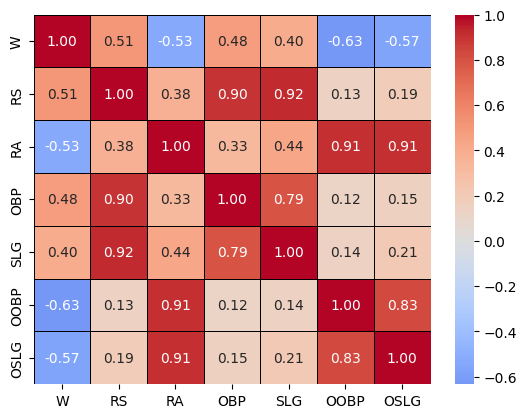

In [6]:
imp_metric = df.loc[:, ["W", "RS", "RA", "OBP", "SLG", "OOBP", "OSLG"]]

sns.heatmap(
    imp_metric.corr(),
    annot=True,
    fmt=".2f",
    linecolor="black",
    linewidths=0.7,
    cmap="coolwarm",
    center=0,
)

**Wins are positively correlated with Runs Scored, OBP and SLG and is negatively correlated with Runs Allowed, OOBP and OSLG.**

## Conclusion from the Correlation Matrix

### Offense:

- We observe a strong positive correlation between Runs Scored (RS), On-Base Percentage (OBP), and Slugging Percentage (SLG).
This indicates that teams with higher OBP and SLG tend to score more runs.
- Additionally, Runs Scored show a positive correlation with Wins, suggesting that:
    - To achieve a high win percentage, a team should focus on improving OBP and SLG.
- **Key Insight**: Players with good plate discipline (high OBP) and power-hitting ability (high SLG) are crucial for offensive success.

### Defense:

- Since OBP and SLG are key factors for run production, the defense must focus on reducing Opponent OBP (OOBP) and Opponent SLG (OSLG) to limit opponent runs.
- **Key Actions**:
    - Invest in pitchers with strong control to minimize walks (lower OOBP).
    - Develop defensive strategies to limit extra-base hits (lower OSLG).
- **Key Insight**: Players with strong pitching, fielding, and game-awareness will help minimize OOBP and OSLG, ultimately improving the team's winning chances.

# Playoff statistics

In [7]:
playoff_yes = df[df["Playoffs"] == 1]
playoff_no = df[df["Playoffs"] == 0]

In [8]:
len(playoff_yes), len(playoff_no)

(244, 988)

In [9]:
# List of attributes
attributes = ["OBP", "SLG", "BA", "RA", "RS"]

# Create empty dictionary
data = {}

# Loop through each attribute
for attr in attributes:
    data[f"P {attr}"] = [
        round(playoff_yes[attr].mean(), 2),
        playoff_yes[attr].median(),
        playoff_yes[attr].mode()[0]
    ]
    data[f"NP {attr}"] = [
        round(playoff_no[attr].mean(), 2),
        playoff_no[attr].median(),
        playoff_no[attr].mode()[0]
    ]

# Create DataFrame
summary_df = pd.DataFrame(data, index=["Mean", "Median", "Mode"]).T
summary_df = summary_df.sort_index(key=lambda x: x.str.split().str[-1])

# Display
print("P: Playoff, NP: Non-Playoff\n")
display(summary_df)


P: Playoff, NP: Non-Playoff



,Mean,Median,Mode
P BA,0.27,0.2670,0.270
NP BA,0.26,0.2580,0.263
P OBP,0.34,0.3380,0.338
NP OBP,0.32,0.3230,0.320
P RA,666.13,661.5000,643.000
NP RA,727.17,723.0000,717.000
P RS,786.27,780.5000,731.000
NP RS,697.50,692.0000,682.000
P SLG,0.42,0.4200,0.436
NP SLG,0.39,0.3905,0.381


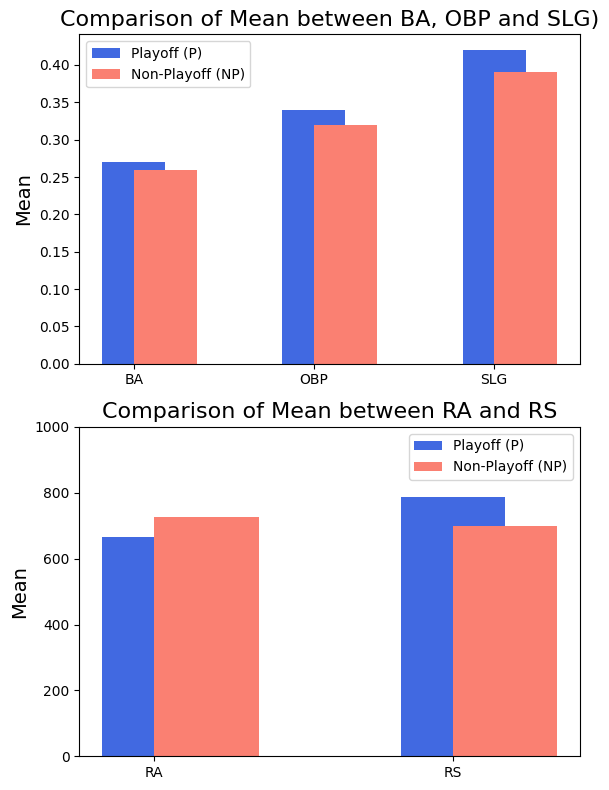

In [10]:
# Extract the relevant columns for plotting
metrics_small = ["BA", "OBP", "SLG"]
metrics_large = ["RA", "RS"]

# Get the values for Playoff and Non-Playoff from the summary_df
p_values_small = summary_df.loc[["P BA", "P OBP", "P SLG"], "Mean"].values
np_values_small = summary_df.loc[["NP BA", "NP OBP", "NP SLG"], "Mean"].values

p_values_large = summary_df.loc[["P RA", "P RS"], "Mean"].values
np_values_large = summary_df.loc[["NP RA", "NP RS"], "Mean"].values

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))  # One row, two columns

# Plot smaller metrics (BA, OBP, SLG)
ax1.bar(
    metrics_small,
    p_values_small,
    width=0.35,
    label="Playoff (P)",
    color="royalblue",
    align="center",
)
ax1.bar(
    metrics_small,
    np_values_small,
    width=0.35,
    label="Non-Playoff (NP)",
    color="salmon",
    align="edge",
)
ax1.set_title("Comparison of Mean between BA, OBP and SLG)", fontsize=16)
ax1.set_ylabel("Mean", fontsize=14)
ax1.legend()

# Plot larger metrics (RA, RS)
ax2.bar(
    metrics_large,
    p_values_large,
    width=0.35,
    label="Playoff (P)",
    color="royalblue",
    align="center",
)
ax2.bar(
    metrics_large,
    np_values_large,
    width=0.35,
    label="Non-Playoff (NP)",
    color="salmon",
    align="edge",
)
ax2.set_title("Comparison of Mean between RA and RS", fontsize=16)
ax2.set_ylabel("Mean", fontsize=14)
ax2.legend()
ax2.set_ylim(0, 1000)  

# Adjust layout
plt.tight_layout()
plt.show()


## Conclusion

Although there isn't a significant difference in metrics between the qualifying and non-qualifying teams. However, on average, the qualifying teams tend to have higher OBP (On-Base Percentage), SLG (Slugging Percentage), BA (Batting Average), and RS (Runs Scored) compared to the non-qualifying teams.

These offensive metrics seem to play a crucial role in determining playoff success, indicating that teams with better on-base ability, power hitting, and run production generally perform better.